In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
import cartopy.crs as ccrs
import pickle
#import Tracking_Functions

import os
os.chdir('/work/aa0238/a271093/Scripts/')
import MOAAP.Tracking_Functions as Tracking_Functions

ModuleNotFoundError: No module named 'MOAAP.Tracking_Functions'

In [ ]:
ds_ivtu=xr.open_dataset('/work/aa0049/a271109/spice-v2.1/chain/work/polarres_wp3_cmip_CNRM/post/yearly/IVTu/IVTu_2008010100-2008123123.ncz')
ds_ivtv=xr.open_dataset('/work/aa0049/a271109/spice-v2.1/chain/work/polarres_wp3_cmip_CNRM/post/yearly/IVTv/IVTv_2008010100-2008123123.ncz')

#ds_ivtu2=xr.open_dataset('/work/aa0049/a271109/spice-v2.1/chain/work/polarres_WP4_MOSAiC_2020-04_11km/post/2020_04/IVTu_ts.ncz')
#ds_ivtv=xr.open_dataset('/work/aa0049/a271109/spice-v2.1/chain/work/polarres_WP4_MOSAiC_2020-04_11km/post/2020_04/IVTv_ts.ncz')

In [ ]:
Time=np.array(pd.DataFrame(ds_ivtu.time.values,columns=['Datetime'])['Datetime'].values.astype('datetime64[s]').tolist())
Time_sel=Time[(Time>datetime.datetime(2008, 4, 1, 0, 0)) &
(Time<datetime.datetime(2008, 4, 4, 0, 0))]

In [ ]:
ds_ivtu=ds_ivtu.sel(time=Time_sel)
ds_ivtv=ds_ivtv.sel(time=Time_sel)

rLon = xr.broadcast(ds_ivtu.rlon, ds_ivtu.rlat)[0].values.T
rLat = xr.broadcast(ds_ivtu.rlon, ds_ivtu.rlat)[1].values.T

Lon = xr.broadcast(ds_ivtu.lon, ds_ivtu.lat)[0].values
Lat = xr.broadcast(ds_ivtu.lon, ds_ivtu.lat)[1].values


#xr.broadcast(ds_ivtu.rlon, ds_ivtu.rlat)[1].values.T[:,:]

In [5]:
#rLon, rLat= xr.broadcast(ds_ivtu.rlon, ds_ivtu.rlat)[0].values.T, xr.broadcast(ds_ivtu.rlon, ds_ivtu.rlat)[1].values.T[:,:]

Mask=1*(rLat>-999)
#Mask=np.ones(rLat.shape)

In [6]:

#ds_ivt_pctl=xr.open_dataset('/work/aa0049/a271109/data_misc/AR_Guan/code/ivt_percentile_mlauer_removed-ens-lev_remapbilWP3domain.nc',decode_times=False)
ds_ivt_pctl=xr.open_dataset('/work/aa0049/a271109/data_misc/AR_Guan/code/ivt_percentile_mlauer_removed-ens-lev_remapbilWP3domain.nc',decode_times=False)

IVTtrheshold=ds_ivt_pctl.ivt1.values

Tracking_Functions.moaap(Lon = rLon,                           # 2Dlongitude grid centers
       Lat = rLat,                           # 2D latitude grid spacing
       Time = Time_sel,                         # datetime vector of data
       dT = 1,                              # integer - temporal frequency of data [hour]
       Mask = Mask,                         # mask with dimensions [lat,lon] defining analysis region

       ivte = ds_ivtu.IVTu.values, # zonal integrated vapor transport [kg m-1 s-1]
       ivtn = ds_ivtv.IVTv.values, # meidional integrated vapor transport [kg m-1 s-1]
       regular_Lon = Lon,
       regular_Lat = Lat,
       IVTtrheshold = ds_ivt_pctl.ivt1.values, # Integrated water vapor transport threshold for AR detection [kg m-1 s-1]
       # JLa: additionall fixed threshold 100 in code

       DataName = 'test2',
       OutputFolder='/work/aa0238/a271093/scratch/'
      )


 
The provided variables allow tracking the following phenomena
 
|  phenomenon  | tracking |
---------------------------
   Jetstream   |   no
   PSL CY/ACY  |   no
   Z500 CY/ACY |   no
   COLs        |   no
   IVT ARs     |   yes
   MS ARs      |   no
   Fronts      |   no
   TCs         |   no
   MCSs        |   no
   Equ. Waves  |   no
---------------------------
 
======> track IVT streams and atmospheric rivers (ARs)
        98 object found
        break up long living IVT objects that have many elements


100%|██████████| 8/8 [00:01<00:00,  6.06it/s]


        00:00:01.92
{'4': array([-1,  9,  0, 23, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), '6': array([  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 309]), '10': array([317,   0, 333,   0,   0,   0,   0,   0,   0,   0,   0, 436, 455,
       475,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]), '12': array([  0,   0,   0,   0, 676,   0, 742,   0, 775,   0,  13,   0, 807,
       814, 822,  -1]), '13': array([609,   0,   0, 712,   0,   0,   0,   0,  12]), '1': array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0]), '5': array([  9,  13,   0,   0,   0,  42,   0,   0,  75,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 219,   0,   0,   0,   0, 253,   0,   0,
       302,   9]), '7': array([5, 0, 0, 0, 0, 0, 0, 0, 0]), '8': array([ 77,   0,   0

/work/aa0238/a271093/Scripts/MOAAP/Tracking_Functions.py:247: RuntimeWarning: All-NaN slice encountered
  obj_min = np.nanmin(data_slice, axis=(1, 2))
/work/aa0238/a271093/Scripts/MOAAP/Tracking_Functions.py:248: RuntimeWarning: All-NaN slice encountered
  obj_max = np.nanmax(data_slice, axis=(1, 2))
/work/aa0238/a271093/Scripts/MOAAP/Tracking_Functions.py:249: RuntimeWarning: Mean of empty slice
  obj_mean = np.nanmean(data_slice, axis=(1, 2))
/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/scipy/ndimage/_measurements.py:1407: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


        check if MSs quallify as ARs
            Loop over 17 objects
        00:00:03.90
 
Save the object masks into a joint netCDF
Saved: /work/aa0238/a271093/scratch/ObjectMasks_test2.nc
        00:00:03.40


In [151]:
ds=xr.open_dataset('/work/aa0238/a271093/scratch/ObjectMasks_test_2008_07_01-2009_02_01.nc')
ds.IVT_Objects

In [7]:
with open('/work/aa0238/a271093/scratch/IVT_test2.pkl', 'rb') as pickle_file:
    IVT1 = pickle.load(pickle_file)
    
IVT1['6']['split_info']

{'4': array([-1,  9,  0, 23, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 '6': array([  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 309]),
 '10': array([317,   0, 333,   0,   0,   0,   0,   0,   0,   0,   0, 436, 455,
        475,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]),
 '12': array([  0,   0,   0,   0, 676,   0, 742,   0, 775,   0,  13,   0, 807,
        814, 822,  -1]),
 '13': array([609,   0,   0, 712,   0,   0,   0,   0,  12]),
 '1': array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0]),
 '5': array([  9,  13,   0,   0,   0,  42,   0,   0,  75,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 219,   0,   0,   0,   0, 253,   0,   0,
        302,   9]),
 '7': array([5, 0, 0, 0, 0, 0, 0, 0, 0]),
 '8': array([ 77,   0,   0,   

In [10]:
IVT1.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])

In [9]:
#IVT_Objects_binary=1*(ds_out_ar.IVT_Objects>0)
IVT_Objects_binary = ds_out_ar.IVT_Objects
IVT_Objects_binary.shape

(215, 582, 577)

In [10]:
labels=scipy.ndimage.label(IVT_Objects_binary.values)[0]
labels.shape

(215, 582, 577)

In [11]:
ds_out_ar_mod=ds_out_ar.IVT_Objects.to_dataset().copy()
ds_out_ar_mod.IVT_Objects.values=labels

In [22]:
#IVT_pickle = pickle.load('/work/aa0238/a271093/results/IVT_200804_test_dt-1h_MOAAP-masks.pkl')
with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_2dx2dy_1984_01_01-1984_07_01_corrected.pkl', 'rb') as pickle_file:
    IVT_pkl = pickle.load(pickle_file)
    
#with open('/work/aa0238/a271093/scratch/ARs_200801_test_2008_01_01_2008_08_01__dt-1h_MOAAP-masks.pkl', 'rb') as pickle_file:
#    AR_pkl = pickle.load(pickle_file)

In [38]:
IVT_pkl['555']['lat_idx_slice ']


slice(198, 258, None)

In [47]:
np.argwhere(~np.isnan(IVT_pkl['1']['data_slice'])).shape

(174, 3)

In [48]:
IVT_pkl['1']['data_slice'].shape

(12, 7, 27)

In [51]:
IVT_pkl['1']['data_slice'].shape

(12, 7, 27)

In [14]:
IVT_pkl['1'].keys()

dict_keys(['mass_center_loc', 'speed', 'tot', 'min', 'max', 'mean', 'size', 'times', 'track', 'lat_slice', 'lon_slice', 'object_slice', 'data_slice', 'split_info'])

In [73]:
from MOAAP.functions import * 
from dateutil import relativedelta
first_year = 2008
last_year = 2010

start_date_list, end_date_list = create_datetime_lists(first_year,last_year) 
end_date_list

[datetime.datetime(2008, 8, 1, 0, 0),
 datetime.datetime(2009, 2, 1, 0, 0),
 datetime.datetime(2009, 8, 1, 0, 0),
 datetime.datetime(2010, 2, 1, 0, 0)]

In [74]:
file_start_date = start_date_list[3]
file_end_date = end_date_list[3] 
file_end_date = file_end_date - relativedelta.relativedelta(months=1)

with open(f'/work/aa0238/a271093/scratch/IVT_200907_test_{get_datetime_str(file_start_date)}_{get_datetime_str(file_end_date + relativedelta.relativedelta(months=1))}__dt-1h_MOAAP-masks.pkl', 'rb') as pickle_file:
    IVT_dict = pickle.load(pickle_file)

dict_bak = dict(IVT_dict)
for i, key in enumerate(dict_bak.keys()):
    ob_start_date =  dict_bak[key]['times'][0]
    ob_end_date =  dict_bak[key]['times'][-1]
    
    if ob_start_date < file_end_date:
        continue
    
    if ob_start_date == file_start_date:
        del IVT_dict[key] 

    if ob_end_date > file_end_date and ob_start_date > file_end_date:
        del IVT_dict[key]
        
        
#IVT_pkl.keys()

In [75]:
IVT_dict.keys()

dict_keys(['6001', '6002', '6003', '6004', '6005', '6006', '6007', '6008', '6009', '6010', '6011', '6012', '6013', '6014', '6015', '6016', '6017', '6018', '6019', '6020', '6021', '6022', '6023', '6024', '6025', '6026', '6027', '6028', '6029', '6030', '6031', '6032', '6033', '6034', '6035', '6036', '6037', '6038', '6039', '6040', '6041', '6042', '6043', '6044', '6045', '6046', '6047', '6048', '6049', '6050', '6051', '6052', '6053', '6054', '6055', '6056', '6057', '6058', '6059', '6060', '6061', '6062', '6063', '6064', '6065', '6066', '6067', '6068', '6069', '6070', '6071', '6072', '6073', '6074', '6075', '6076', '6077', '6078', '6079', '6080', '6081', '6082', '6083', '6084', '6085', '6086', '6087', '6088', '6089', '6090', '6091', '6092', '6093', '6094', '6095', '6096', '6097', '6098', '6099', '6100', '6101', '6102', '6103', '6104', '6105', '6106', '6107', '6108', '6109', '6110', '6111', '6112', '6113', '6114', '6115', '6116', '6117', '6118', '6119', '6120', '6121', '6122', '6123', '6124

In [76]:
dict_bak.keys()

dict_keys(['6001', '6002', '6003', '6004', '6005', '6006', '6007', '6008', '6009', '6010', '6011', '6012', '6013', '6014', '6015', '6016', '6017', '6018', '6019', '6020', '6021', '6022', '6023', '6024', '6025', '6026', '6027', '6028', '6029', '6030', '6031', '6032', '6033', '6034', '6035', '6036', '6037', '6038', '6039', '6040', '6041', '6042', '6043', '6044', '6045', '6046', '6047', '6048', '6049', '6050', '6051', '6052', '6053', '6054', '6055', '6056', '6057', '6058', '6059', '6060', '6061', '6062', '6063', '6064', '6065', '6066', '6067', '6068', '6069', '6070', '6071', '6072', '6073', '6074', '6075', '6076', '6077', '6078', '6079', '6080', '6081', '6082', '6083', '6084', '6085', '6086', '6087', '6088', '6089', '6090', '6091', '6092', '6093', '6094', '6095', '6096', '6097', '6098', '6099', '6100', '6101', '6102', '6103', '6104', '6105', '6106', '6107', '6108', '6109', '6110', '6111', '6112', '6113', '6114', '6115', '6116', '6117', '6118', '6119', '6120', '6121', '6122', '6123', '6124

In [71]:
dict_bak['5854']['times']

array([datetime.datetime(2009, 6, 30, 21, 0),
       datetime.datetime(2009, 6, 30, 22, 0),
       datetime.datetime(2009, 6, 30, 23, 0),
       datetime.datetime(2009, 7, 1, 0, 0),
       datetime.datetime(2009, 7, 1, 1, 0),
       datetime.datetime(2009, 7, 1, 2, 0),
       datetime.datetime(2009, 7, 1, 3, 0),
       datetime.datetime(2009, 7, 1, 4, 0),
       datetime.datetime(2009, 7, 1, 5, 0),
       datetime.datetime(2009, 7, 1, 6, 0),
       datetime.datetime(2009, 7, 1, 7, 0),
       datetime.datetime(2009, 7, 1, 8, 0),
       datetime.datetime(2009, 7, 1, 9, 0),
       datetime.datetime(2009, 7, 1, 10, 0),
       datetime.datetime(2009, 7, 1, 11, 0),
       datetime.datetime(2009, 7, 1, 12, 0),
       datetime.datetime(2009, 7, 1, 13, 0),
       datetime.datetime(2009, 7, 1, 14, 0),
       datetime.datetime(2009, 7, 1, 15, 0),
       datetime.datetime(2009, 7, 1, 16, 0),
       datetime.datetime(2009, 7, 1, 17, 0),
       datetime.datetime(2009, 7, 1, 18, 0),
       datetime.d

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

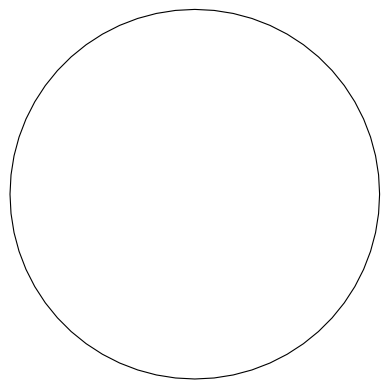

In [18]:
fig,ax=plt.subplots(1,1,subplot_kw={'projection': ccrs.Orthographic(0,90)})

pole_lon=ds_ivtu.rotated_pole.attrs['grid_north_pole_longitude']
pole_lat=ds_ivtu.rotated_pole.attrs['grid_north_pole_latitude']
crs_arctic = ccrs.RotatedPole(pole_longitude=pole_lon, pole_latitude=pole_lat)

tt='2008-04-19T12:00:00.000000000'
#ds_out_ar.IVT.sel(time=tt).plot(x='lon',y='lat',vmin=0,vmax=250,ax=ax,cmap='Blues',transform=ccrs.PlateCarree())
#(ds_out_ar.IVT_Objects.sel(time=tt)>0).plot.contour(x='lon',y='lat',levels=1,colors='b',linewidths=2,ax=ax,transform=ccrs.PlateCarree())

ds_out_ar.IVT.sel(time=tt).plot(x='lon',y='lat',vmin=0,vmax=250,ax=ax,cmap='Blues',transform=crs_arctic)
(ds_out_ar.IVT_Objects.sel(time=tt)>0).plot.contour(x='lon',y='lat',levels=1,colors='b',linewidths=2,ax=ax,transform=crs_arctic)
#(ds_out_ar.AR_Objects.sel(time=tt)>0).plot.contour(x='lon',y='lat',levels=1,colors='c',linestyles='--',alpha=0.75,linewidths=2,ax=ax,transform=crs_arctic)

for aa in [ax]:
    aa.set_extent([-180,180, 60, 90], crs=ccrs.PlateCarree())
    aa.add_feature(cartopy.feature.OCEAN, color='white', zorder=0)
    aa.add_feature(cartopy.feature.LAND, color='lightgray',zorder=0,linewidth=0.5, edgecolor='black')
    aa.gridlines(linewidth=0.5, color='gray',xlocs=range(-180,180,45), ylocs=range(-90,90,10),linestyle=':') #draw_labels=True, 
    aa.coastlines(linewidth=0.3, color='black')

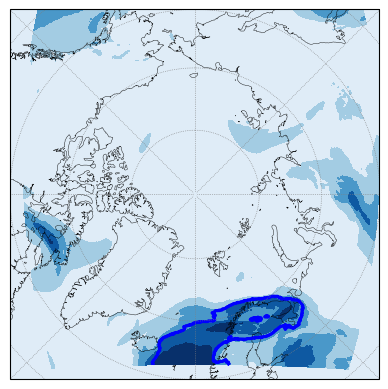

In [193]:
fig,ax=plt.subplots(1,1,subplot_kw={'projection': ccrs.Orthographic(0,90)})



tt='2008-04-19T12:00:00.000000000'
IVT = ds_out_ar.IVT.sel(time=tt)
IVT_obj = (ds_out_ar.AR_Objects.sel(time=tt)>0)



ax.contourf(Lon, Lat, IVT, vmin=0,vmax=250,cmap='Blues',transform=ccrs.PlateCarree())
ax.contour(Lon, Lat, IVT_obj, levels=1,colors='b',linewidths=2,transform=ccrs.PlateCarree())

ax.set_extent([-180,180, 60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, color='white', zorder=0)
ax.add_feature(cartopy.feature.LAND, color='lightgray',zorder=0,linewidth=0.5, edgecolor='black')
ax.gridlines(linewidth=0.5, color='gray',xlocs=range(-180,180,45), ylocs=range(-90,90,10),linestyle=':') #draw_labels=True, 
ax.coastlines(linewidth=0.3, color='black')

In [179]:
Lat

array([[47.628674, 47.69564 , 47.762493, ..., 49.202137, 49.13803 ,
        49.0738  ],
       [47.696445, 47.763554, 47.830544, ..., 49.273296, 49.20905 ,
        49.144672],
       [47.764114, 47.831364, 47.89849 , ..., 49.344357, 49.27997 ,
        49.215446],
       ...,
       [51.242443, 51.308205, 51.37386 , ..., 52.79022 , 52.72705 ,
        52.66376 ],
       [51.181206, 51.246803, 51.31229 , ..., 52.724995, 52.661995,
        52.598873],
       [51.11983 , 51.18526 , 51.250587, ..., 52.659637, 52.596806,
        52.53385 ]], dtype=float32)

In [28]:
%load_ext autoreload
%autoreload 2

import os
import datetime
os.chdir('/work/aa0238/a271093/Scripts/')

from MOAAP.functions import * 
first_year = 2008
last_year = 2010

start_date_list, end_date_list = create_datetime_lists(first_year,last_year,months=6,correct_last_endtime=False) 
first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]
start_date_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 7, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0),
 datetime.datetime(2009, 7, 1, 0, 0)]

In [29]:
end_date_list

[datetime.datetime(2008, 7, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0),
 datetime.datetime(2009, 7, 1, 0, 0),
 datetime.datetime(2010, 1, 1, 0, 0)]

In [17]:
start_date = datetime.datetime(2008,7,1,0,0)
end_date = datetime.datetime(2008,1,1,0,0)
start_date

datetime.datetime(2008, 7, 1, 0, 0)

In [18]:
start_date_list[0]

[datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 7, 1, 0, 0),
 datetime.datetime(2009, 1, 1, 0, 0),
 datetime.datetime(2009, 7, 1, 0, 0)]

In [41]:
object_files=[f'test_{get_datetime_str(x)}-{get_datetime_str(y)}' for x,y in zip(start_date_list,end_date_list)] 
object_files[0]

'test_2008_01_01-2008_07_01'

In [37]:

Object_set = {}
def get_Tracking_Objects(first_year, last_year):
    
    start_date_list, end_date_list = create_datetime_lists(first_year,last_year,months=6,correct_last_endtime=False) 
    
    object_files=[f'test_{get_datetime_str(x)}-{get_datetime_str(y)}' for x,y in zip(start_date_list,end_date_list)] 
    
    
    return object_files

def create_objects_from_nested_dict(nested_dict):
    for key in nested_dict.keys():
        IVT_ob+'key'
    pass

In [40]:
get_Tracking_Objects(2008,2009)

['test_2008_01_01-2008_07_01', 'test_2008_07_01-2009_01_01']

In [20]:
getObjects(object_files) 

datetime.datetime(2008, 7, 1, 0, 0)

In [ ]:
class TrackingObject:
       
    def __init__(self, center_of_mass,):
        pass
    
    @property
    def center_of_mass(self):
        pass
    
    @cached_property
    
class IVTObject(Trackingobject):
    pass
    

    

In [46]:
l=set()
l.add((1,2))

In [4]:
import pickle

with open('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/IVT_MOAPP_ICON_control_CNRMforc_100and85controlperc_1986_07_01-1987_01_01_corrected.pkl', 'rb') as pickle_file:
    IVT2 = pickle.load(pickle_file)

In [26]:
key = '15001'
IVTobj_dict={}
for key in IVT2.keys():
    
    
    ds = xr.Dataset(
        data_vars=dict(
            obj_size=(['size'], IVT2[key]['size']),
        ),
        coords=dict(
            times=IVT2[key]['times']
        )
    )
        
    IVTobj_dict[f'{key}'] =ds


In [38]:
u=IVTobj_dict['15001']

In [27]:
[np.mean(x) for x,y in IV

SyntaxError: incomplete input (2185724897.py, line 1)

In [81]:
IVTobj_list=[]
for key in IVT2.keys():
    ds = xr.Dataset(
            data_vars=dict(
                
                #obj_size=(IVT2[key]['size']),
                times=(IVT2[key]['times']),
        ),
            coords=dict(
                id_= key
        )
    )
    
    IVTobj_list.append(ds)

In [86]:
a=xr.concat(IVTobj_list)
a.times.shape
#IVTobj_list[0].times

TypeError: concat() missing 1 required positional argument: 'dim'

In [52]:
[getattr(x, 'obj_size') for x in list(IVTobj_dict.items())]


AttributeError: 'tuple' object has no attribute 'obj_size'

In [71]:
IVT2['30001'].keys()
IVT2['30006']


{'mass_center_loc': array([[73.5       , 43.5       ],
        [71.07142857, 44.        ],
        [68.36363636, 44.13636364],
        [65.17857143, 44.25      ],
        [61.59259259, 44.2962963 ],
        [59.03571429, 43.92857143],
        [57.72      , 43.44      ],
        [52.10416667, 42.64583333],
        [50.72619048, 41.39285714],
        [50.24590164, 40.25409836],
        [48.22929936, 39.44585987],
        [45.15568862, 38.60479042],
        [42.87222222, 37.72777778],
        [40.9760479 , 36.63473054],
        [38.79545455, 35.39772727],
        [36.0959596 , 34.08080808],
        [33.63861386, 32.67326733],
        [31.27014218, 31.43601896],
        [29.10138249, 30.0875576 ],
        [27.02415459, 28.89855072],
        [25.48584906, 27.70283019],
        [24.22772277, 26.28217822],
        [23.44162437, 24.88832487],
        [21.93193717, 23.34031414],
        [20.61325967, 21.90055249],
        [19.375     , 20.20238095],
        [18.05442177, 18.54421769],
        [

In [36]:
from dateutil import relativedelta

def create_obj_from_dict(dict_, key, input_path, input_file_name_temp, start_date, end_date, nc_correct=True):
        if nc_correct:
            end_date = end_date+relativedelta.relativedelta(months=1)
            
            
        ds = xr.Dataset(
            data_vars=dict(
                            id_ = key,
                
                            nc_file = f'{input_path}ObjectMasks_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}.nc',
                            size=(['times'], dict_[key]['size']*1e-6 * units('km^2')),

                            total_IVT=(['times'], dict_[key]['tot']* units('kg/m/s')),
                            mean_IVT=(['times'], dict_[key]['mean']* units('kg/m/s')),
                            max_IVT=(['times'], dict_[key]['max']* units('kg/m/s')),
                            min_IVT=(['times'], dict_[key]['min']* units('kg/m/s')),

                            mass_center_rlat=(['times'], dict_[key]['mass_center_loc'][:,0]),
                            mass_center_rlon=(['times'], dict_[key]['mass_center_loc'][:,1]),
            
                            track_rlat=(['times'], dict_[key]['track'][:,0]),
                            track_rlon=(['times'], dict_[key]['track'][:,1]),
            
                            speed=(['times'], np.insert(dict_[key]['speed'],0,np.nan)* units('m/s'))
                            ),
            coords=dict(
                        times=dict_[key]['times']
                        )
                    )
        
        return ds
    

In [37]:
os.chdir('/work/aa0238/a271093/Scripts/')
import MOAAP.Tracking_Functions as Tracking_Functions
from MOAAP.functions import * 

first_year = 1984
last_year = 1987

start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 
#start_date_list_nc, end_date_list_nc = create_datetime_lists(first_year,last_year, months=7, correct_last_endtime=False) 

first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]
end_date_list

[datetime.datetime(1984, 7, 1, 0, 0),
 datetime.datetime(1985, 1, 1, 0, 0),
 datetime.datetime(1985, 7, 1, 0, 0),
 datetime.datetime(1986, 1, 1, 0, 0),
 datetime.datetime(1986, 7, 1, 0, 0),
 datetime.datetime(1987, 1, 1, 0, 0)]

In [38]:
from metpy.units import units

IVTobj_ls=[]
input_path = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/'
type_='IVT'
input_file_name_temp = 'MOAPP_ICON_control_CNRMforc_100and85controlperc'

for start_date, end_date in zip(start_date_list, end_date_list):
    pickle_file_path = f'{input_path}{type_}_{input_file_name_temp}_{get_datetime_str(start_date)}-{get_datetime_str(end_date)}_corrected'
    
    dict_ = get_dict_from_pkl(pickle_file_path)
    

    for object_id in dict_.keys():
        ds = create_obj_from_dict(dict_,
                                  object_id,
                                  input_path,
                                  input_file_name_temp,
                                  start_date,
                                  end_date,
                                  
                                 )
        
        IVTobj_ls.append(ds)
    

    

        
    IVTobj_ls.append(ds)

In [25]:
IVTobj_ls[-1].speed
a=[np.mean(getattr(x, 'speed')) for x in IVTobj_ls]

In [43]:
IVTobj_ls[4000].get.start_date

numpy.datetime64('1985-05-10T07:00:00.000000000')

In [40]:
IVTobj_ls[4000].nc_file

<xarray.DataArray 'nc_file' ()>
array('/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control/ObjectMasks_MOAPP_ICON_control_CNRMforc_100and85controlperc_1985_01_01-1985_08_01.nc',
      dtype='<U145')

In [42]:
@xr.register_dataset_accessor("get")
class GeoAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        #self.start_date = None
        
    
    @property
    def start_date(self):
        return self._obj.times[0].values
    
    @property 
    def grid_points(self):
        ds=xr.open_dataset()

/tmp/ipykernel_2289637/3397589029.py:2: AccessorRegistrationWarning: registration of accessor <class '__main__.GeoAccessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class GeoAccessor:


In [90]:
os.chdir('/work/aa0238/a271093/Scripts/')
import MOAAP.Tracking_Functions as Tracking_Functions
from MOAAP.functions import * 

first_year = 1984
last_year = 1987

start_date_list, end_date_list = create_datetime_lists(first_year,last_year, months=7, correct_last_endtime=False) 
start_date_list_nc, end_date_list_nc = create_datetime_lists(first_year,last_year, months=6, correct_last_endtime=False) 

first_processed_date = start_date_list[0]
last_processed_date = end_date_list[-1]
end_date_list

[datetime.datetime(1984, 8, 1, 0, 0),
 datetime.datetime(1985, 2, 1, 0, 0),
 datetime.datetime(1985, 8, 1, 0, 0),
 datetime.datetime(1986, 2, 1, 0, 0),
 datetime.datetime(1986, 8, 1, 0, 0),
 datetime.datetime(1987, 2, 1, 0, 0)]

In [96]:
import xarray as xr


@xr.register_dataset_accessor("geo")
class GeoAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        self._center = None

    @property
    def center(self):
        """Return the geographic center point of this dataset."""
        if self._center is None:
            # we can use a cache on our accessor objects, because accessors
            # themselves are cached on instances that access them.
            lon = self._obj.latitude
            lat = self._obj.longitude
            self._center = (float(lon.mean()), float(lat.mean()))
        return self._center

    def plot(self):
        """Plot data on a map."""
        return "plotting!"
    
    
ds = xr.Dataset({"longitude": np.linspace(0, 10), "latitude": np.linspace(0, 20)})
ds.geo.center

/tmp/ipykernel_629020/847188887.py:5: AccessorRegistrationWarning: registration of accessor <class '__main__.GeoAccessor'> under name 'geo' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class GeoAccessor:


(10.0, 5.0)

In [162]:
ds=xr.open_dataset('/work/aa0238/a271093/scratch/ObjectMasks_test_2009_07_01-2010_01_01.nc')


In [16]:
a = np.array(([0,1,1,0],
                  [0,1,1,0],
                  [0,1,1,0],
                  [0,1,1,0]))
from scipy import ndimage
ndimage.measurements.center_of_mass(a)

/tmp/ipykernel_723557/3151940601.py:6: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  ndimage.measurements.center_of_mass(a)


(1.5, 1.5)